## Final Project Submission

Please fill out:
* Student name: Anila Qureshi
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Dave Baker
* Blog post URL:


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest
import statsmodels.api as sm

%matplotlib inline

In [2]:
data = pd.read_csv('/Users/aqureshi/Desktop/DS_021720/dsc_mod2_proj_marwan_anila/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
X=data.drop('price', axis=1)
y=data['price']

In [6]:
data['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [7]:
data['bathrooms'].describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [8]:
data['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [9]:
data['sqft_lot'].describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [10]:
x_mult_coef= data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]
x_mult_coef=sm.add_constant(x_mult_coef)
x_mult_coef.head()

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,bedrooms,bathrooms,sqft_living,sqft_lot
0,1.0,3,1.00,1180,5650
1,1.0,3,2.25,2570,7242
2,1.0,2,1.00,770,10000
3,1.0,4,3.00,1960,5000
4,1.0,3,2.00,1680,8080


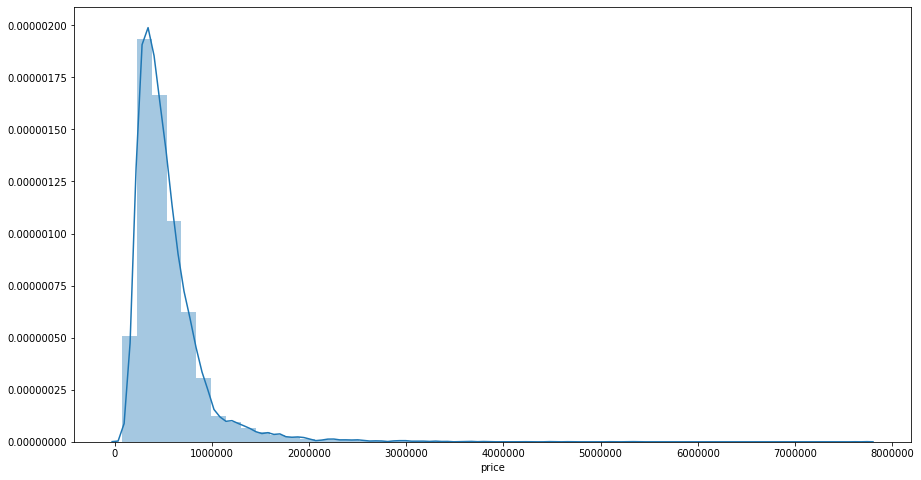

In [11]:
plt.figure(figsize=(15,8))
sns.distplot(data['price']);
plt.show()

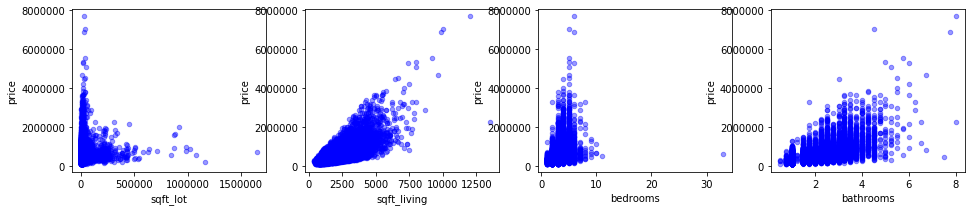

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_lot', 'sqft_living', 'bedrooms', 'bathrooms'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

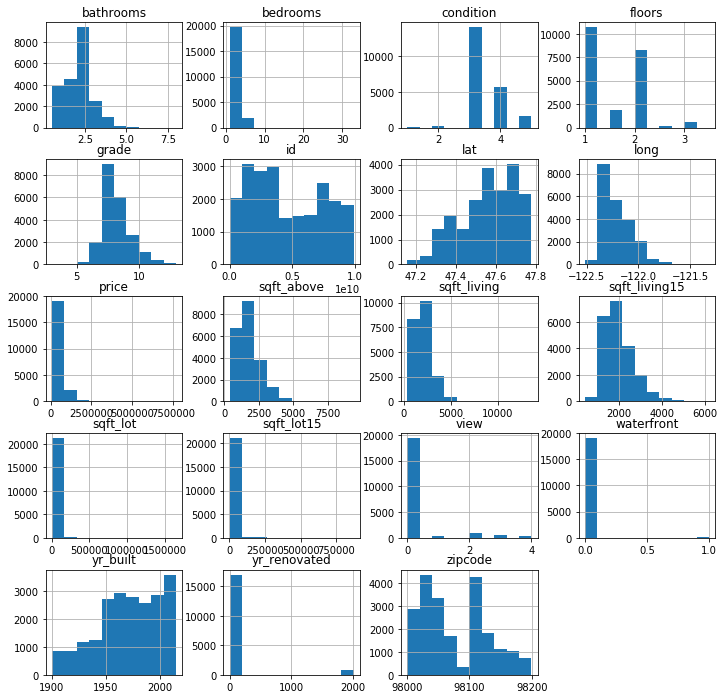

In [13]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
data.hist(ax = ax);

In [14]:
data[['condition', 'floors', 'view', 'waterfront', 'grade']].nunique()


condition      5
floors         6
view           5
waterfront     2
grade         11
dtype: int64

In [15]:
condition = data['condition']
condition_series = pd.Series(condition)

In [16]:
cat_condition = condition_series.astype('category')
cat_condition

0        3
1        3
2        3
3        5
4        3
        ..
21592    3
21593    3
21594    3
21595    3
21596    3
Name: condition, Length: 21597, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

In [17]:
pd.get_dummies(cat_condition)

condition,1,2,3,4,5
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,1,0,0
...,...,...,...,...,...
21592,0,0,1,0,0
21593,0,0,1,0,0
21594,0,0,1,0,0
21595,0,0,1,0,0


In [18]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
condition_dummies = lb.fit_transform(cat_condition)
# You need to convert this back to a dataframe
condition_dum_df = pd.DataFrame(condition_dummies,columns=lb.classes_)
condition_dum_df

,1,2,3,4,5
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,1,0,0
...,...,...,...,...,...
21592,0,0,1,0,0
21593,0,0,1,0,0
21594,0,0,1,0,0
21595,0,0,1,0,0


In [19]:
trap_df = pd.get_dummies(cat_condition)
trap_df

condition,1,2,3,4,5
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,1,0,0
...,...,...,...,...,...
21592,0,0,1,0,0
21593,0,0,1,0,0
21594,0,0,1,0,0
21595,0,0,1,0,0


In [20]:
pd.get_dummies(cat_condition, drop_first=True)


condition,2,3,4,5
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
21592,0,1,0,0
21593,0,1,0,0
21594,0,1,0,0
21595,0,1,0,0


In [21]:
con_dummies=pd.get_dummies(data['condition'], prefix='con', drop_first=True)
floor_dummies=pd.get_dummies(data['floors'], prefix='floor', drop_first=True)
wtrfrnt_dummies=pd.get_dummies(data['waterfront'], prefix='wtrfrnt', drop_first=True)
view_dummies=pd.get_dummies(data['view'], prefix='view', drop_first=True)
grade_dummies=pd.get_dummies(data['grade'], prefix='grade', drop_first=True)
bdrm_dummies=pd.get_dummies(data['bedrooms'], prefix='bdrm', drop_first=True)
bthrm_dummies=pd.get_dummies(data['bathrooms'], prefix='bthrm', drop_first=True)


In [22]:
data1 = data.drop(['condition', 'floors', 'waterfront', 'view', 'grade', 'bedrooms', 'bathrooms'], axis=1)

In [23]:
data1 = pd.concat([data, con_dummies, floor_dummies, wtrfrnt_dummies, view_dummies, grade_dummies, bdrm_dummies, bthrm_dummies], axis=1)
data1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,bthrm_5.25,bthrm_5.5,bthrm_5.75,bthrm_6.0,bthrm_6.25,bthrm_6.5,bthrm_6.75,bthrm_7.5,bthrm_7.75,bthrm_8.0
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data1.shape

(21597, 84)

In [25]:
data_pred = data[['bedrooms','bathrooms','sqft_living', 'sqft_lot', 'floors','waterfront','view','grade','sqft_above','sqft_basement']]
data_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,NaN,0.0,7,1180,0.0
1,3,2.25,2570,7242,2.0,0.0,0.0,7,2170,400.0
2,2,1.00,770,10000,1.0,0.0,0.0,6,770,0.0
3,4,3.00,1960,5000,1.0,0.0,0.0,7,1050,910.0
4,3,2.00,1680,8080,1.0,0.0,0.0,8,1680,0.0


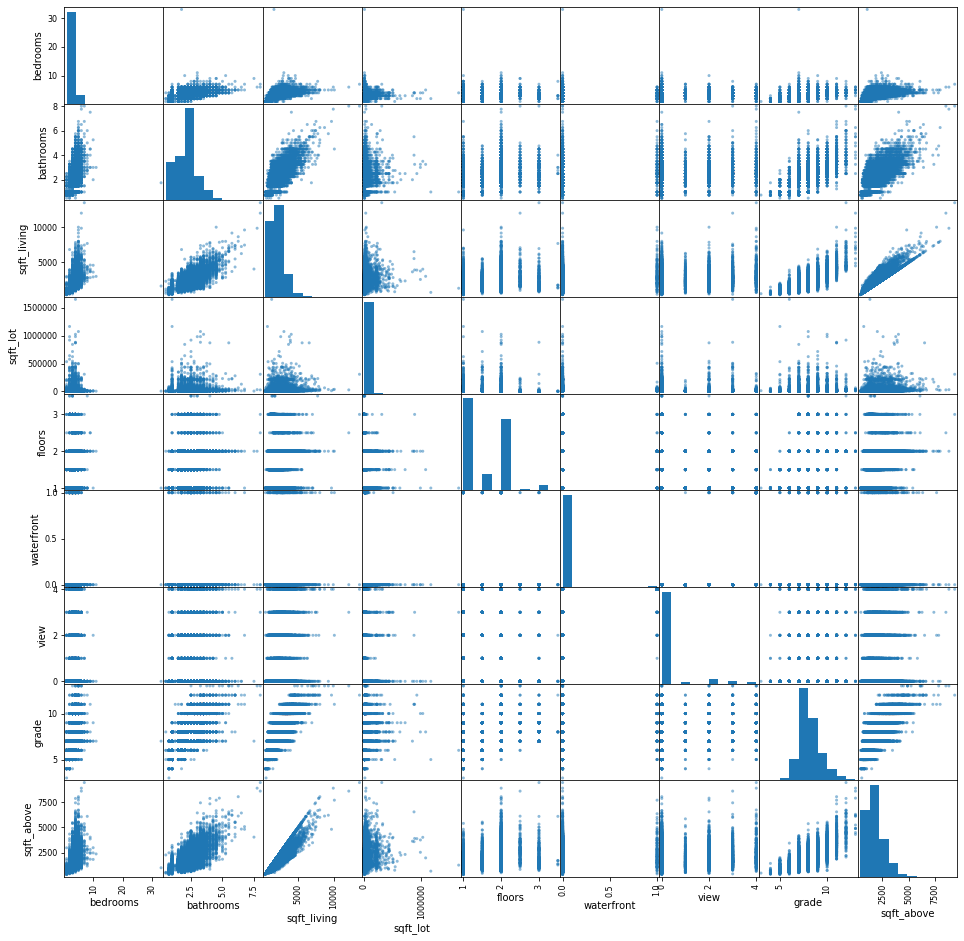

In [26]:
pd.plotting.scatter_matrix(data_pred, figsize =[16,16]);
plt.show()

In [27]:
data_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.356563,0.479386
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,0.665838,0.686668
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,0.762779,0.876448
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,0.114731,0.184139
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,0.458794,0.523989
waterfront,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.087383,0.075463
view,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.249727,0.166299
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,0.249727,1.000000,0.756073
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.075463,0.166299,0.756073,1.000000


In [28]:
abs(data_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above
bedrooms,True,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,True,True
sqft_lot,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False
view,False,False,False,False,False,False,True,False,False
grade,False,False,True,False,False,False,False,True,True
sqft_above,False,False,True,False,False,False,False,True,True


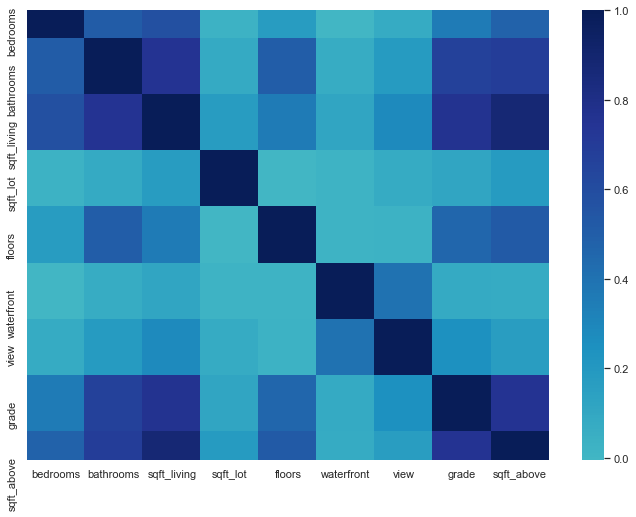

In [29]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data_pred.corr(), center=0, cmap="YlGnBu")


In [30]:
from statsmodels.formula.api import ols

In [31]:
outcome = 'price'
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above']
predictors= '+'.join(x_cols)
formula = outcome + '~' + predictors
model =ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     3189.
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:30:50   Log-Likelihood:            -2.6417e+05
No. Observations:               19164   AIC:                         5.284e+05
Df Residuals:                   19154   BIC:                         5.284e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.819e+05   1.54e+04    -31.214      0.000   -5.12e+05   -4.52e+05
bedrooms    -3.295e+04   2330.039    -14.142      0.000   -3.75e+04   -2.84e+04
bathrooms    -1.85e+04   3783.789     -4.888      0.000   -2.59e+04   -1.11e+04
sqft_living   230.1826      5.184     44.405      0.000     220.022     240.343
sqft_lot       -0.3672      0.043     -8.569      0.000      -0.451      -0.283
floors      -1.473e+04   4224.779     -3.487      0.000    -2.3e+04   -6450.330
waterfront   5.992e+05   2.15e+04     27.925      0.000    5.57e+05    6.41e+05
view         6.184e+04   2588.788     23.886      0.000    5.68e+04    6.69e+04
grade        1.001e+05   2449.566     40.878      0.000    9.53e+04    1.05e+05
sqft_above    -35.6585      5.071     -7.032      0.000     -45.598     -25.719
==============================================================================
Omnibus:                    13780.963   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           788836.676
Skew:                           2.876   Prob(JB):                         0.00
Kurtosis:                      33.900   Cond. No.                     5.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

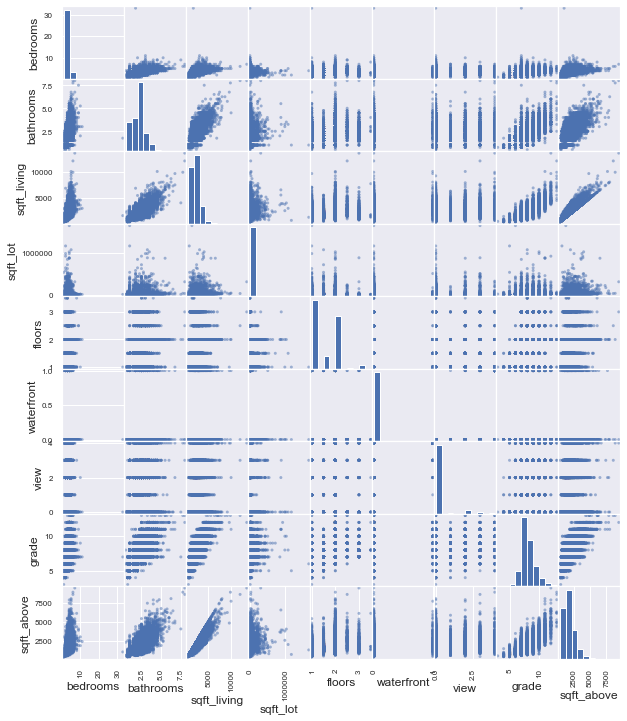

In [33]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));
